## Introduction

Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

When you collect data and extract features, many times the data is collected on different scales. For example, the age of employees in a company may be between 21-70 years, the size of the house they live is 500-5000 Sq feet and their salaries may range from Rs.30000- Rs.80000 In this situation if you use a simple Euclidean metric, the age feature will not play any role because it is several order smaller than other features

It is also useful for algorithms that weight inputs like regression and neural networks
and algorithms that use distance measures like k-Nearest Neighbors. You can rescale your data
using scikit-learn using the MinMaxScaler class.

Data normalization can speed up the coverage of gradient descent algorithm.

### Some cases you don't need data normalization
1. using a similarity function instead of distance function
>You can propose a similarity function rather than a distance function and plug it in a kernel (technically this function must generate positive-definite matrices).

2. Random forest
>Random forest never compare one feature with another in magnitude, so the ranges don't matter.

3. Naive Bayes 
>Some model like Naive Bayes doesn't requires feature scaling.


#### Notes
- Normalization methods represent compromises designed to achieve particular ends.
- Normalization requires taking values that span one range and representing them in another range. This requires remapping values from an input range to an output range.
- Each method of remapping may introduce various distortions or biases into the data.
- Some biases and distortions are deliberately introduced to better expose informationcontent. Others are unknowingly or accidentally introduced, and damage information
exposure. 
- Some types of bias and distortion introduced in some normalization processes are beneficial only for particular types of data, or for particular modeling methods


#### 1- Min-max normalization 
retains the original distribution of scores except for a scaling factor and transforms all the scores into a common range [0, 1]. However, this method is not robust (i.e., the method is highly sensitive to outliers.

#### 2- Standardization (Z-score normalization) 
The most commonly used technique, which is calculated using the arithmetic mean and standard deviation of the given data. However, both mean and standard deviation are sensitive to outliers, and this technique does not guarantee a common numerical range for the normalized scores. Moreover, if the input scores are not Gaussian distributed, this technique does not retain the input distribution at the output.

#### 3- Unit Norm Scaling
Scale the components of a feature vector such that the complete vector has length one.

#### 4- Median and MAD: 
The median and median absolute deviation (MAD) are insensitive to outliers and the points in the extreme tails of the distribution. therefore it is robust. However, this technique does not retain the input distribution and does not transform the scores into a common numerical range.

#### 5- tanh-estimators: 
The tanh-estimators introduced by Hampel et al. are robust and highly efficient. 

### sklearn Basics 

###### Transformer 
- Transformers are classes that implement both fit() and transform(). 
>fit() is the method you call to fit or 'train' your transformer, like you would a classifier or regression model. As for transform(), that is the method you call to actually transform the input data into the output data. 

##### Predictor or Estimators
Estimators are classes that implement both fit() and predict(). You'll find that many of the classifiers and regression models implement both these methods, and as such you can readily test many different models. It is possible to use another transformer as the final estimator (i.e., it doesn't necessarily implement predict()
- In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).

##### Pipeline 
Pipeline is just an abstract notion, it's not some existing ml algorithm. Often in ML tasks you need to perform sequence of different transformations (find set of features, generate new features, select only some good features) of raw dataset before applying final estimator.

** Loading the wine data set **

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()



,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [35]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
dataframe = pd.read_csv(filename, names=names)
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
dataframe.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
X_pima = dataframe.iloc[:, 0:8]
y_pima = dataframe.iloc[:,0:8]
minmax_scale = MinMaxScaler(feature_range=(0, 1))

In [3]:
df.describe()

,Class label,Alcohol,Malic acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


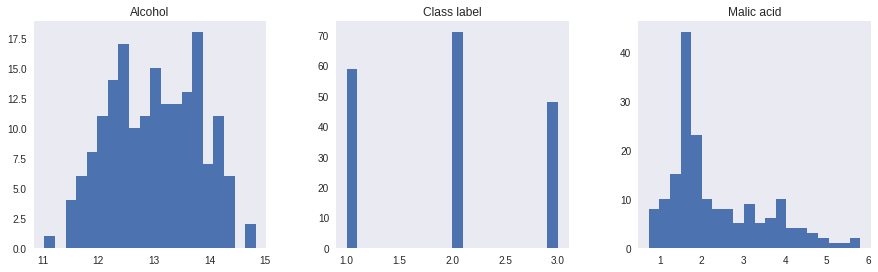

In [134]:
pd.DataFrame.hist(df, grid=False, layout=(3,3), figsize=(15,15), bins=20)
plt.show()


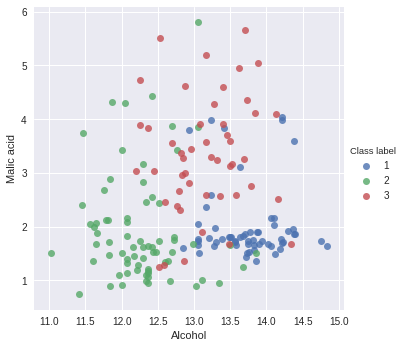

In [103]:
_ = sns.lmplot('Alcohol', 'Malic acid', data=df, hue='Class label', fit_reg=False)
plt.show()

In [127]:
#All classes are nearly qualyy distributed as also seen by histogram
print(df['Class label'].value_counts())

2    71
1    59
3    48
Name: Class label, dtype: int64


### 1. Min-max normalization

Mahematical formula is 

$x' = \dfrac{(x-min)}{(max-min)}$

After rescaling all values are in the range between 0 and 1


In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Min-Max Normalization
minmax_scale = MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
min_max_x = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [16]:
print(minmax_scale.data_max_)
print(minmax_scale.data_min_)

[ 14.83   5.8 ]
[ 11.03   0.74]


In [30]:
min_max_x[0:5,:]

array([[ 0.84210526,  0.1916996 ],
       [ 0.57105263,  0.2055336 ],
       [ 0.56052632,  0.3201581 ],
       [ 0.87894737,  0.23913043],
       [ 0.58157895,  0.36561265]])

### 2. Z-score standardization 

The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with

μ=0 and σ=1

In [133]:
# Standardization
std_scale = StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

#Scaled data has zero mean and unit variance:

print('Mean after standardization:')
print('------------------------') 
print('Alcohol = {:.0f},\nMalic acid = {:.0f}'.format(standard_x[:,0].mean(), standard_x[:,1].mean()))
print('\nStandard deviation after standardization:')
print('--------------------------')
print('Alcohol = {:.3f},\nMalic acid = {:.3f}'.format(standard_x[:,0].std(), standard_x[:,1].std()))

Mean after standardization:
------------------------
Alcohol = -0,
Malic acid = -0

Standard deviation after standardization:
--------------------------
Alcohol = 1.000,
Malic acid = 1.000


### Z-score standardization or Min-Max scaling?

“Standardization or Min-Max scaling?” - There is no obvious answer to this question: it really depends on the application.

- Normalizer acts row-wise and StandardScaler column-wise. 
- Normalizer does not remove the mean and scale by deviation but scales the whole row to unit norm.

>For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix; but more about PCA in my previous article).

However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.



<img src="http://www.grroups.com/uploads_media/1f30b1743582b7ee1dca79bc9207dcba.png" width=700>



## 3. Scaling to unit length

Another option that is widely used in machine-learning is to scale the components of a feature vector such that the complete vector has length one. This usually means dividing each component by the Euclidean length of the vector. In some applications (e.g. Histogram features) it can be more practical to use the L1 norm (i.e. Manhattan Distance, City-Block Length or Taxicab Geometry) of the feature vector:


$x_{norm} = \dfrac{x}{||x||}$

where ||x|| is the Euclidian length of the feature vector.



## 4. Binarization